In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics 

In [4]:
df = pd.read_csv("/content/BTC.csv")
df.head()

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  4687 non-null   object 
 1   date    4687 non-null   object 
 2   open    4687 non-null   float64
 3   high    4687 non-null   float64
 4   low     4687 non-null   float64
 5   close   4687 non-null   float64
dtypes: float64(4), object(2)
memory usage: 219.8+ KB


In [6]:
df = df.drop(columns = ["ticker","date"],axis =1)
df.head()

,open,high,low,close
0,0.04951,0.04951,0.04951,0.04951
1,0.04951,0.08585,0.04951,0.08584
2,0.08584,0.09307,0.07723,0.08080
3,0.08080,0.08181,0.07426,0.07474
4,0.07474,0.07921,0.06634,0.07921


In [7]:
df.describe()


,open,high,low,close
count,4687.000000,4687.000000,4687.000000,4687.000000
mean,9066.285772,9308.739998,8797.022459,9072.345548
std,14555.281877,14939.417993,14115.454725,14557.354743
min,0.049510,0.049510,0.010000,0.049510
25%,142.000000,147.145000,137.860000,142.210000
50%,922.910000,955.530000,890.430000,924.690000
75%,10142.650000,10391.000000,9787.950000,10143.550000
max,67304.600000,68976.500000,66343.000000,67305.100000


In [8]:
y = df['close']
X = df.drop(columns = ['close'],axis = 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=46)


In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)


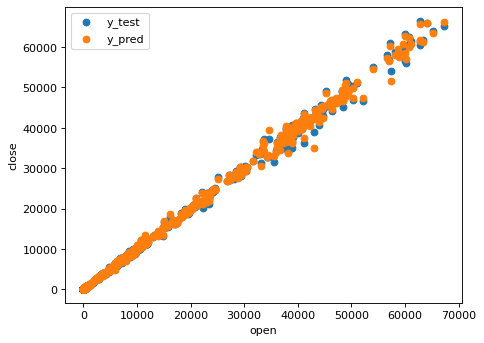

In [12]:
a = X_test.open
b = y_test

c = X_test.open
d = y_pred

plt.figure(dpi= 80)
plt.scatter(a, b)
plt.scatter(c, d)
plt.legend(["y_test", "y_pred"])
plt.xlabel("open")
plt.ylabel("close")
plt.show()


In [13]:
model.score(X_test,y_test)


0.9995602567225309

In [14]:
X_7 = X.iloc[-7:]
X_7

,open,high,low
4680,27630.3,28345.8,26885.1
4681,27533.3,27751.7,26776.8
4682,27005.0,27113.4,25845.9
4683,26771.5,27031.6,26653.4
4684,26876.0,27167.5,26651.6
4685,26922.8,27682.9,26753.4
4686,27381.6,27387.2,26885.3


In [15]:
ypred = model.predict(X_7)
ypred

array([27674.719675  , 27149.92507671, 26269.49816644, 26838.75242308,
       26900.7379266 , 27379.63402243, 26986.92844073])

In [16]:
result = metrics.mean_absolute_error(y.iloc[-7:],ypred)


In [17]:
diff =(result*100)/(ypred.sum()/7)
print("so there is a so there is a lag of ",diff,"% for the last 7 days")

so there is a so there is a lag of  0.4685480207967604 % for the last 7 days


In [18]:
X_365 = X.iloc[-365:]
X_365

,open,high,low
4322,30130.8,30718.6,29440.4
4323,30512.1,30652.6,28714.6
4324,29171.2,30506.4,28635.5
4325,30248.7,30715.4,28692.7
4326,29148.4,29617.3,28916.1
...,...,...,...
4682,27005.0,27113.4,25845.9
4683,26771.5,27031.6,26653.4
4684,26876.0,27167.5,26651.6
4685,26922.8,27682.9,26753.4


In [19]:
ypred365 = model.predict(X_365)


In [20]:
result = metrics.mean_absolute_error(y.iloc[-365:],ypred365)


In [21]:
diff365 =(result*100)/(ypred365.sum()/365)
print("so there is a so there is a lag of ",diff365,"% for the last year")

so there is a so there is a lag of  0.8356723084668733 % for the last year
